In [9]:
import pandas as pd

# Read the 1st dataset from Excel file
df1 = pd.read_excel('Inventory Dataset.xlsx')
print(df1)



,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399


In [10]:
# Read the 2nd dataset from Excel file
df2 = pd.read_excel('New Inventory.xlsx')
df2.head()

,Item Number,Inventory Receive,Total Item Qty
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000


In [14]:
# Convert date columns to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')

df2['Inventory Receive'] = pd.to_datetime(df2['Inventory Receive'], format='%d-%m-%Y')



In [16]:
# Merge datasets on 'item number'
merged_df = pd.merge(df1, df2, on='Item Number', how='outer')

In [18]:
# Forward fill NaN values in 'inventory receive date' and 'item qty' columns
merged_df['Inventory Receive'] = merged_df['Inventory Receive'].ffill()
merged_df['Total Item Qty'] = merged_df['Total Item Qty'].fillna(0)


In [19]:
# Calculate cumulative sum of 'item qty' for each item and date
merged_df['cumulative_qty'] = merged_df.groupby(['Item Number'])['Total Item Qty'].cumsum()

In [20]:
# Pivot the table to get inventory levels at different dates for each item
pivot_table = pd.pivot_table(merged_df, values='cumulative_qty', index=['Item Number'], columns='Date', aggfunc='last', fill_value=0)

In [24]:
# Display the result
print(pivot_table)
pivot_table.head()

Date         2023-06-17
Item Number            
064-01-0006           0
064-01-1346        7936
064-01-1347        8368
064-01-1348        5552
064-01-1349        8448
...                 ...
064-18-9878           0
064-18-9884           0
064-18-9909           0
064-18-9938       15448
064-18-9962           0

[356 rows x 1 columns]


Date,2023-06-17
Item Number,
064-01-0006,0
064-01-1346,7936
064-01-1347,8368
064-01-1348,5552
064-01-1349,8448


<Figure size 1000x600 with 0 Axes>

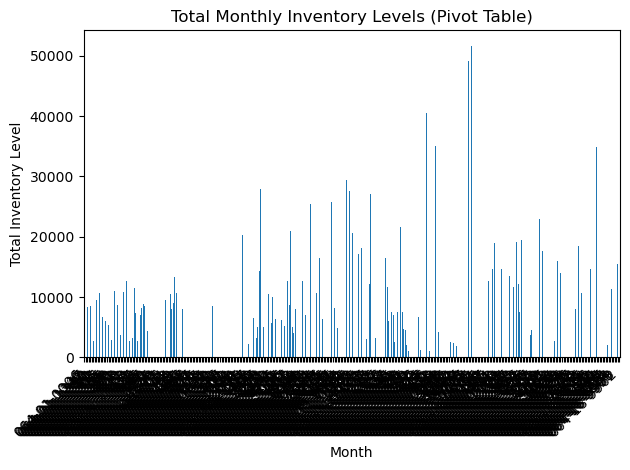

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', legend=False)
plt.xlabel('Month')
plt.ylabel('Total Inventory Level')
plt.title('Total Monthly Inventory Levels (Pivot Table)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()